# Regresión Lineal: Coste de indice de seguridad

En este ejercicio se explican los fundamentos basicos de la regresion lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

# 1. Random dataset generation 

In [20]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

print("Data set length is:", len(X))

Data set length is: 100


# 2. Display dataset 

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline 

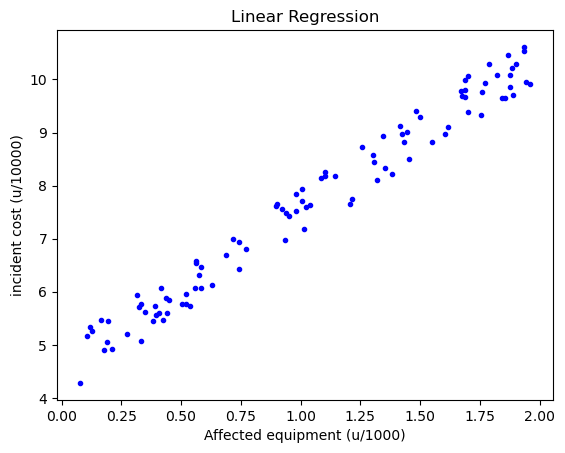

In [89]:
plt.plot(X, y, 'b.')
plt.title("Linear Regression")
plt.xlabel("Affected equipment (u/1000)")
plt.ylabel("incident cost (u/10000)");

# 3. Dataset modification

In [92]:
import pandas as pd 

In [94]:
df = pd.DataFrame({'n_affected_equimpent': X.flatten(), 'incident cost': y.flatten()})
df

,n_affected_equimpent,incident cost
0,1.352508,8.339608
1,0.581973,6.076676
2,0.104988,5.166634
3,1.484347,9.413071
4,0.631596,6.136315
...,...,...
95,1.759036,9.771789
96,1.845066,9.657322
97,0.127541,5.259238
98,1.604381,8.976453


In [96]:
# Scale of afected equipments number
df['n_affected_equimpent'] *= 1000
df['n_affected_equimpent'] = df['n_affected_equimpent'].astype('int')

# Scale of incident cost
df['incident cost'] *= 10000
df['incident cost'] = df['incident cost'].astype('int')
df.head(10)

,n_affected_equimpent,incident cost
0,1352,83396
1,581,60766
2,104,51666
3,1484,94130
4,631,61363
5,1687,98087
6,1320,80996
7,1433,88201
8,687,66936
9,1875,98561


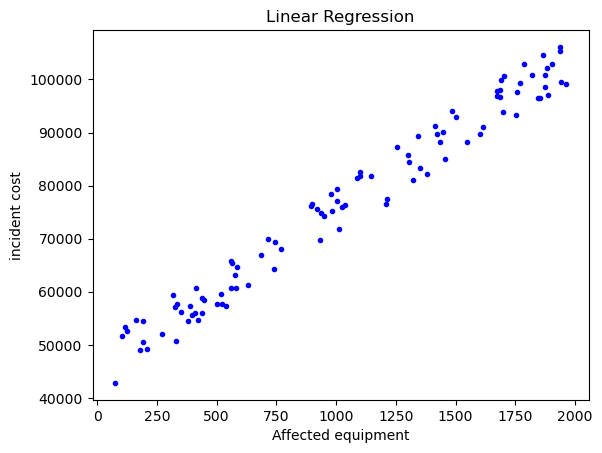

In [98]:
# Display Dataset
plt.plot(df['n_affected_equimpent'], df['incident cost'], 'b.')
plt.title("Linear Regression")
plt.xlabel("Affected equipment")
plt.ylabel("incident cost");

# 4. Model construction

In [101]:
from sklearn.linear_model import LinearRegression

In [103]:
# Model construction and hypothesis function setting
linear_regression = LinearRegression()
linear_regression.fit(df['n_affected_equimpent'].values.reshape(-1, 1), df['incident cost'].values)

LinearRegression()

In [105]:
# parameter theta 0
linear_regression.intercept_

45836.452970684695

In [107]:
# Parameter theta 1
linear_regression.coef_

array([29.60601196])

In [113]:
X_min_max = np.array([[df['n_affected_equimpent'].min()], [df['n_affected_equimpent'].max()]])
y_train_pred = linear_regression.predict(X_min_max)

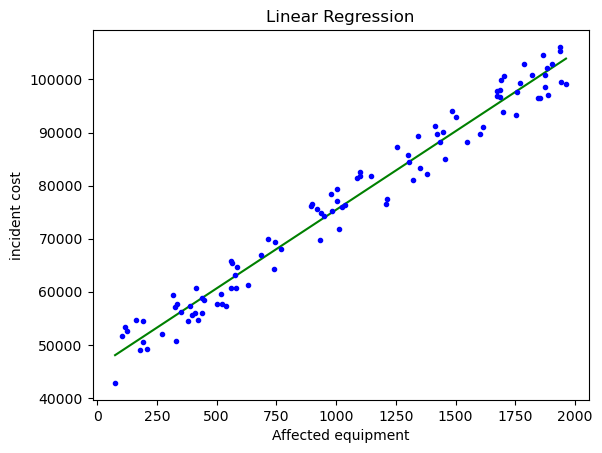

In [115]:
# Graphical representation of the generated hypothesis function
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(df['n_affected_equimpent'], df['incident cost'], 'b.')
plt.title("Linear Regression")
plt.xlabel("Affected equipment")
plt.ylabel("incident cost");

# 5. New prediction examples

In [122]:
x_new = np.array([[820]]) # 820 affected equipment

# Incident cost prediction of x_new
new_incident_cost = linear_regression.predict(x_new)

print("Incident cost is:", int(new_incident_cost[0]), "USD")

Incident cost is: 70113 USD


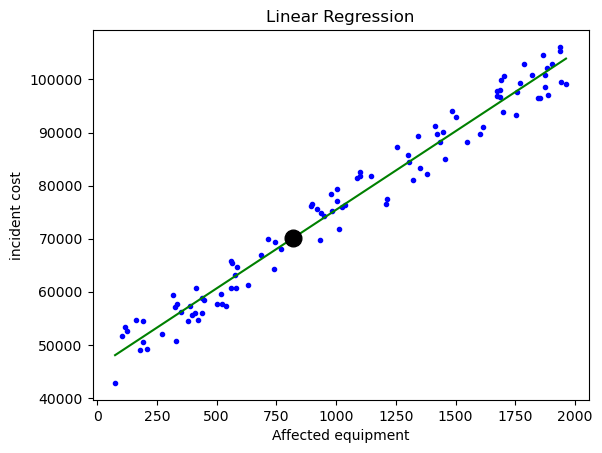

In [136]:
# New Graph
plt.plot(df['n_affected_equimpent'], df['incident cost'], 'b.')
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(x_new, new_incident_cost, color='black', marker='o', markersize=12)
plt.title("Linear Regression")
plt.xlabel("Affected equipment")
plt.ylabel("incident cost");